In [1]:
import numpy as np
import matplotlib.pyplot as plt

D1 = np.array([[1.0, 1.2, 3, 4, 5, 6],          # x좌표
              [1.5, 3, 2.3, 5.3, 3.8, 5.5]])    # y좌표
D2 = np.array([[-0.6, 1.0, 1.2, 3, 4, 5, 6],          # x좌표
              [2.9, 1.5, 3, 2.3, 5.3, 3.8, 5.5]])    # y좌표

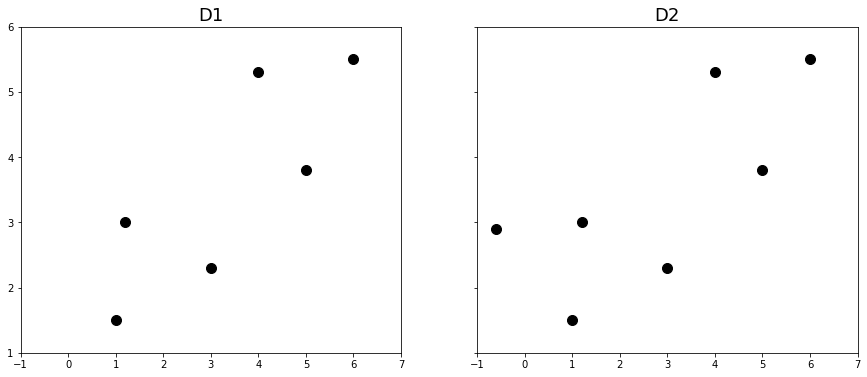

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True)
fig.set_size_inches((15,6))

ax1.plot(D1[0], D1[1], 'ko', markersize=10)
ax1.set_xlim([-1,7])
ax1.set_ylim([1,6])
ax1.set_title('D1', fontsize=18)

ax2.plot(D2[0], D2[1], 'ko', markersize=10)
ax2.set_xlim([-1,7])
ax2.set_ylim([1,6])
ax2.set_title('D2', fontsize=18)

plt.show()

In [6]:
def machine_learning(D):                             # 선형회귀 알고리즘 - 최적의 직선 계산
    N = D.shape[1]
    X = np.c_[np.ones(N), D[0]]
    y = D[1]
    
    w = np.linalg.solve(np.dot(X.T, X), np.dot(X.T, y))
    return w

def more_clever(D):                                  # 첫 점과 끝 점을 이어서 직선 그림
    first, last = D[:,0], D[:,-1]
    w1 = (last[1]-first[1]) / (last[0]-first[0])
    w0 = -w1 * first[0] + first[1]
    return (w0, w1)

def f(x, w):
    return w[1] * x + w[0]

In [7]:
w_ml_d1 = machine_learning(D1)
w_mc_d1 = more_clever(D1)

w_ml_d2 = machine_learning(D2)
w_mc_d2 = more_clever(D2)

x = np.linspace(-1, 7, 100)

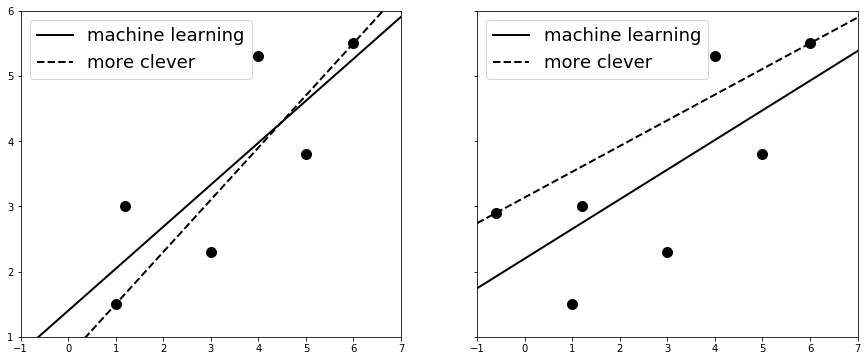

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True)
fig.set_size_inches((15,6))

ax1.plot(D1[0], D1[1], 'ko', markersize=10)
ax1.plot(x, f(x, w_ml_d1), c='k', lw=2, label='machine learning')
ax1.plot(x, f(x, w_mc_d1), '--', c='k', lw=2, label='more clever')
ax1.set_xlim([-1,7])
ax1.set_ylim([1,6])
ax1.legend(fontsize=18)

ax2.plot(D2[0], D2[1], 'ko', markersize=10)
ax2.plot(x, f(x, w_ml_d2), c='k', lw=2, label='machine learning')
ax2.plot(x, f(x, w_mc_d2), '--', c='k', lw=2, label='more clever')
ax2.set_xlim([-1,7])
ax2.set_ylim([1,6])
ax2.legend(fontsize=18)

plt.show()

In [22]:
import numpy as np
import matplotlib.pyplot as plt

D1 = np.array([[1.0, 1.2, 3, 4, 5, 6],          
              [1.5, 3, 2.3, 5.3, 3.8, 5.5]])  

num_iters = 250  # 선 긋기 150번 반복
eta = 0.02

np.random.seed(2)
w = np.random.randn(2)
N = D1.shape[1]

ws, L = [], []

# 1열에는 숫자 1이 있고, 2열에는 데이터의 x좌표가 있는 행렬 X를 만듭니다.
# X: (N,2), y: (N, )
X = np.c_[np.ones(N), D1[0]]
y = D1[1]

# 여기서 우리의 경험 E를 반복하면서 태스크 T를 개선합니다.
for i in range(num_iters):                                  # 150번 반복
    # grad L
    c = (1/N) * np.dot(X.T, np.dot(X, w) - y)               # 경사도벡터 구하기 (loss가 커지지 않게 하기 위한 안정장치 역할)
    # 안전장치 grad L을 이용해서 w를 수정합니다.
    w -= eta * c                                            # 경사도벡터를 이용해서 w 업데이트
    # w가 변화되는 과정을 저장합니다.
    ws.append(w)
    
    # 손실을 계산합니다.
    L.append(((np.dot(X, w) - y) **2).sum()/(2*N))          # 업데이트된 w 이용해서 현재 직선에 대한 손실값 구하기

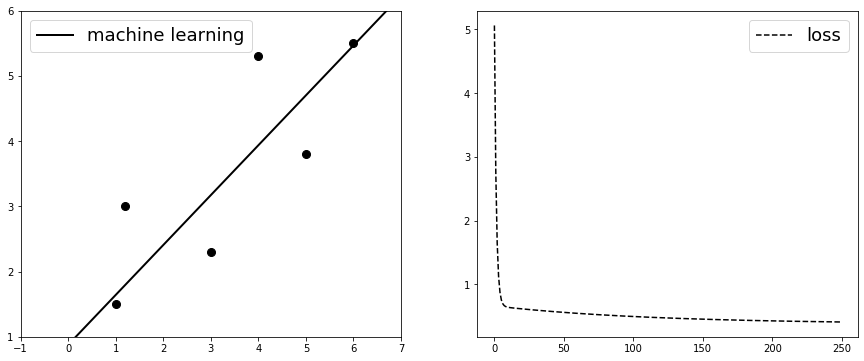

In [25]:
x = np.linspace(-1, 7, 100)

fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches((15,6))

ax1.plot(D1[0], D1[1], 'ko', markersize = 8)
ax1.plot(x, f(x,w), c = 'k', lw = 2, label = 'machine learning')
ax1.set_xlim([-1,7])
ax1.set_ylim([1,6])
ax1.legend(fontsize = 18)

ax2.plot(L[:350], '--', c = 'k', label = 'loss')
ax2.legend(fontsize = 18)

plt.show()